In [2]:
import yfinance as yf
import pandas as pd
from prettytable import PrettyTable
from datetime import datetime, timedelta

# Function to check if a given date is a working day
def is_working_day(date_str):
    # Parse the date string to datetime format
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    
    # Check if the date falls on a weekend (Saturday or Sunday)
    if date_obj.weekday() >= 5:
        return False
    
    # Check if the date falls on a special working day
    special_working_days = {"2024-01-27"}  # Example: Christmas Eve
    if date_str in special_working_days:
        return True
    
    # Check if the date falls on a holiday
    # Add your holiday logic here
    holidays = {"2023-01-26", "2023-03-07", "2023-03-30", "2023-04-04", "2023-04-07", 
                "2023-04-14", "2023-05-01", "2023-06-29", "2023-07-29", "2023-08-15", 
                "2023-09-19", "2023-10-02", "2023-10-24", "2023-11-14", "2023-11-27", 
                "2023-12-25","2024-01-22",
                "2024-01-26", "2024-03-08", "2024-03-25", "2024-03-29", "2024-04-11", 
                "2024-04-17", "2024-05-01", "2024-06-17", "2024-07-17", "2024-08-15", 
                "2024-10-02", "2024-11-01", "2024-11-15", "2024-12-25"}
    if date_str in holidays:
        return False
    
    # If the date is not a weekend, holiday, or special working day, it's a regular working day
    return True

# Function to get the next working date if the provided date is not a working day
def get_next_working_date(date_str):
    # Parse the date string to datetime format
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    
    # Check if the date is a working day
    if is_working_day(date_str):
        return date_obj
    
    # If the date is not a working day, find the next working date
    while True:
        date_obj += timedelta(days=1)
        if is_working_day(date_obj.strftime('%Y-%m-%d')):
            return date_obj

# Define start and end dates
start_date = '2018-02-03'
end_date = '2024-02-10'

# Path to the Excel file
excel_file_path = "C:/Users/91908/Documents/Raja/Share market/Analysis/Trendlyne/Data/Bajel_Increased/MCAP31122023.xlsx"

# Read the Excel file
df = pd.read_excel(excel_file_path)

# Extract stock codes from the 'Symbol' column
stock_codes = df['Symbol'].tolist()

# Take the second 30 stocks
selected_stock_codes = stock_codes[344:346]
stock_data = {}

# Download historical stock data for each selected stock code  -------------------------------->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# for stock_code in selected_stock_codes:
#     data = yf.download(stock_code+".NS", start=start_date, end=end_date)
#        # Store the data in the dictionary
#     # Resample the data to monthly frequency
#     # data = data.resample('M').agg({
#     #     'Open': 'first',
#     #     'High': 'max',
#     #     'Low': 'min',
#     #     'Close': 'last',
#     #     'Adj Close': 'last',
#     #     'Volume': 'sum'
#     # })
    
#     # Remove rows corresponding to holidays
#     for date_str in data.index.strftime('%Y-%m-%d'):
#         if not is_working_day(date_str):
#             data_monthly = data_monthly[data_monthly.index != date_str]
#             stock_data[stock_code] = data_monthly

#     # Calculate VWAP
#     data_monthly['Volume_Price'] = data_monthly['Volume'] * (data_monthly['High'] + data_monthly['Low'] + data_monthly['Close']) / 3
#     data_monthly['Cumulative_Volume_Price'] = data_monthly['Volume_Price'].cumsum()
#     data_monthly['Cumulative_Volume'] = data_monthly['Volume'].cumsum()
#     data_monthly['VWAP'] = data_monthly['Cumulative_Volume_Price'] / data_monthly['Cumulative_Volume']
    
#     # Calculate average volume over the entire time range
#     average_volume = data_monthly['Volume'].mean()
    
#     # Calculate three-day rolling average volume
#     data_monthly['Three_Day_Avg_Volume'] = data_monthly['Volume'].rolling(window=3).mean()
    
#     # Create a PrettyTable to store the data
#     table = PrettyTable()
#     table.field_names = ["Date", "Close", "Volume", "VWAP", "Average Volume", "Three-Day Average Volume"]
    
#     # Add each row of data to the table
#     for index, row in data_monthly.iterrows():
#         table.add_row([index.strftime("%Y-%m-%d"), f"{row['Close']:.2f}", f"{row['Volume']:.2f}", f"{row['VWAP']:.2f}",
#                        f"{average_volume:.2f}", f"{row['Three_Day_Avg_Volume']:.2f}"])
    
#     # Print the table
#     print(f"Stock Code: {stock_code}")
#     # print(table)
#     print("\n\n")
# print(stock_data)
# Download historical stock data for each selected stock code  -------------------------------->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Download historical stock data for each selected stock code
for stock_code in selected_stock_codes:
    data = yf.download(stock_code+".NS", start=start_date, end=end_date)
    
    # Remove rows corresponding to holidays
    for date_str in data.index.strftime('%Y-%m-%d'):
        if not is_working_day(date_str):
            data = data[data.index != date_str]
    
    # Check if the DataFrame is empty after removing non-working days
    if data.empty:
        print(f"No data available for stock code: {stock_code}")
        continue
    
    # Calculate VWAP
    data['Volume_Price'] = data['Volume'] * (data['High'] + data['Low'] + data['Close']) / 3
    data['Cumulative_Volume_Price'] = data['Volume_Price'].cumsum()
    data['Cumulative_Volume'] = data['Volume'].cumsum()
    data['VWAP'] = data['Cumulative_Volume_Price'] / data['Cumulative_Volume']
    
    # Calculate average volume over the entire time range
    average_volume = data['Volume'].mean()
    
    # Calculate three-day rolling average volume
    data['Three_Day_Avg_Volume'] = data['Volume'].rolling(window=3).mean()
    
    # Store the data in the dictionary
    stock_data[stock_code] = data
    
    # Create a PrettyTable to store the data
    table = PrettyTable()
    table.field_names = ["Date", "Close", "Volume", "VWAP", "Average Volume", "Three-Day Average Volume"]
    
    # Add each row of data to the table
    for index, row in data.iterrows():
        table.add_row([index.strftime("%Y-%m-%d"), f"{row['Close']:.2f}", f"{row['Volume']:.2f}", f"{row['VWAP']:.2f}",
                       f"{average_volume:.2f}", f"{row['Three_Day_Avg_Volume']:.2f}"])
    
    # Print the table
    print(f"Stock Code: {stock_code}")
    # print(table)
    print("\n\n")
    
# print(stock_data)



[*********************100%%**********************]  1 of 1 completed

C:\Users\91908\AppData\Roaming\Python\Python39\site-packages\yfinance\utils.py:782: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



Stock Code: WELCORP



[*********************100%%**********************]  1 of 1 completed
Stock Code: CHALET





C:\Users\91908\AppData\Roaming\Python\Python39\site-packages\yfinance\utils.py:782: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from prettytable import PrettyTable

# Function to create sequences for LSTM input
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 10

# Create a PrettyTable to store the shift rows
shift_table = PrettyTable()
shift_table.field_names = ["Stock", "Date"] + list(data.columns)

# Iterate over each stock's data
for stock_code, stock_data in stock_data.items():
    # Preprocessing
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data[['Close', 'Volume']].values)

    # Create sequences
    X, y = create_sequences(scaled_data, sequence_length)

    # Define and compile LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
    model.add(LSTM(units=50))
    model.add(Dense(units=2))  # Output layer with 2 neurons for Close and Volume
    model.compile(optimizer='adam', loss='mse')

    # Train LSTM model
    model.fit(X, y, epochs=50, batch_size=32)

    # Predict anomalies
    predictions = model.predict(X)

    # Reshape predictions to match the shape of X
    predictions = np.repeat(predictions[:, np.newaxis, :], X.shape[1], axis=1)

    # Calculate reconstruction errors
    reconstruction_errors = np.mean(np.abs(predictions - X), axis=2)

    # Threshold for anomaly detection (e.g., 2 standard deviations from the mean)
    threshold = np.mean(reconstruction_errors) + 7 * np.std(reconstruction_errors)

    # Identify rows corresponding to shifts
    shift_rows = stock_data.iloc[sequence_length:][np.any(reconstruction_errors > threshold, axis=1)]

    # Add each row of shift_rows to the PrettyTable
    for index, row in shift_rows.iterrows():
        shift_table.add_row([stock_code, index.strftime("%Y-%m-%d")] + list(row))

    # Print the shift table
print(shift_table)


In [ ]:
from datetime import datetime, timedelta
from prettytable import PrettyTable

# Get the current date
current_date = datetime.now()

# Calculate the date 30 days ago
thirty_days_ago = current_date - timedelta(days=120)

# Filter shift_rows for the last 30 days
last_30_days_data = shift_rows.loc[thirty_days_ago:current_date]

# If there is data for the last 30 days, print it; otherwise, print "No data"
if not last_30_days_data.empty:
    # Create a PrettyTable to store the last 30 records from the current date
    shift_table_last_30_days = PrettyTable()
    shift_table_last_30_days.field_names = ["Date"] + list(last_30_days_data.columns)

    # Add each row of the last 30 days data to the PrettyTable
    for index, row in last_30_days_data.iterrows():
        shift_table_last_30_days.add_row([index.strftime("%Y-%m-%d")] + list(row))

    # Print the shift table for the last 30 days data
    print(shift_table_last_30_days)
else:
    print("No data for the last 30 days from the shift_rows.")


In [ ]:
Pictorial representation of Data

Processing stock: WELCORP
Shape of X: (1473, 10, 2)
Shape of y: (1473, 2)


Epoch 1/50

47/47 [==============================] - 3s 9ms/step - loss: 0.0078
Epoch 2/50
47/47 [==============================] - 0s 9ms/step - loss: 0.0021
Epoch 3/50
47/47 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 4/50
47/47 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 5/50
47/47 [==============================] - 0s 10ms/step - loss: 0.0021
Epoch 6/50
47/47 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 7/50
47/47 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 8/50
47/47 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 9/50
47/47 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 10/50
47/47 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 11/50
47/47 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 12/50
47/47 [==============================] 

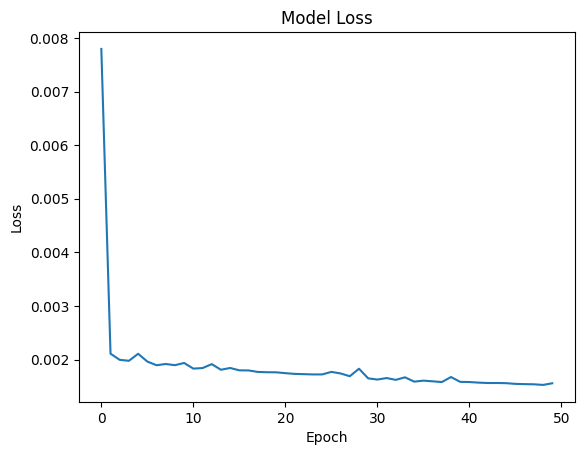

47/47 [==============================] - 1s 3ms/step


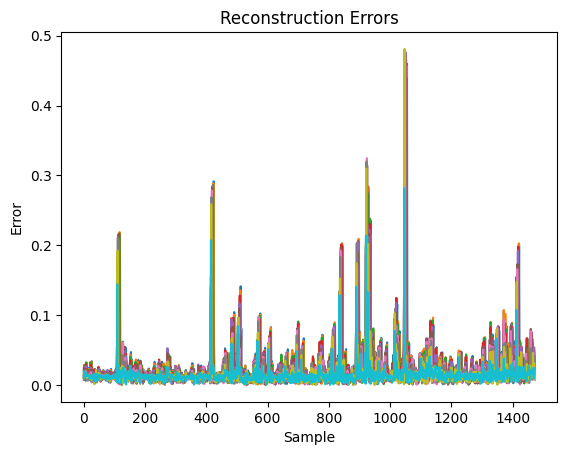

Processing stock: CHALET
Shape of X: (1224, 10, 2)
Shape of y: (1224, 2)
Epoch 1/50
39/39 [==============================] - 3s 10ms/step - loss: 0.0128
Epoch 2/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0020
Epoch 3/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 4/50
39/39 [==============================] - 1s 13ms/step - loss: 0.0018
Epoch 5/50
39/39 [==============================] - 0s 12ms/step - loss: 0.0019
Epoch 6/50
39/39 [==============================] - 0s 11ms/step - loss: 0.0018
Epoch 7/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0018
Epoch 8/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0018
Epoch 9/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0018
Epoch 10/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0018
Epoch 11/50
39/39 [==============================] - 0s 12ms/step - loss: 0.0018
Epoch 12/50
39/39 [==========================

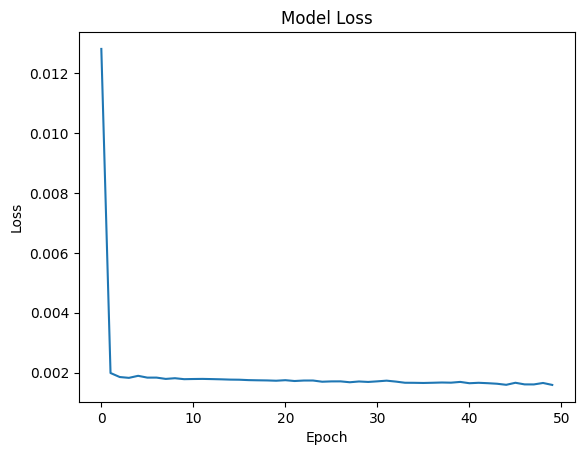

39/39 [==============================] - 1s 3ms/step


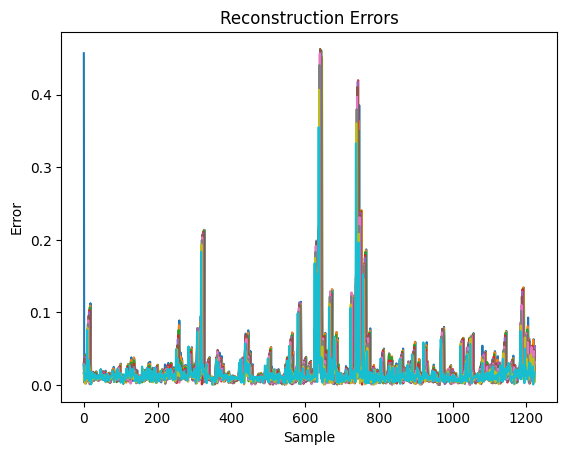

+---------+------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+--------------------+-------------------------+-------------------+--------------------+----------------------+
|  Stock  |    Date    |        Open        |        High        |        Low         |       Close        |     Adj Close      |   Volume   |    Volume_Price    | Cumulative_Volume_Price | Cumulative_Volume |        VWAP        | Three_Day_Avg_Volume |
+---------+------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------+--------------------+-------------------------+-------------------+--------------------+----------------------+
| WELCORP | 2018-07-31 | 121.94999694824219 | 129.60000610351562 |       120.5        | 125.0999984741211  | 109.56880950927734 | 1737737.0  | 217332976.78490958 |     9130248263.40116    |     66216576.0    | 137.88463274514766 |  191921

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from prettytable import PrettyTable
import matplotlib.pyplot as plt

# Function to create sequences for LSTM input
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 10

# Create a PrettyTable to store the shift rows
shift_table = PrettyTable()
shift_table.field_names = ["Stock", "Date"] + list(data.columns)

# Iterate over each stock's data
for stock_code, stock_data in stock_data.items():
    print("Processing stock:", stock_code)

    # Preprocessing
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data[['Close', 'Volume']].values)

    # Create sequences
    X, y = create_sequences(scaled_data, sequence_length)

    # Debugging: Print shapes of X and y
    print("Shape of X:", X.shape)
    print("Shape of y:", y.shape)

    # Define and compile LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
    model.add(LSTM(units=50))
    model.add(Dense(units=2))  # Output layer with 2 neurons for Close and Volume
    model.compile(optimizer='adam', loss='mse')

    # Train LSTM model
    history = model.fit(X, y, epochs=50, batch_size=32)

    # Debugging: Plot training loss over epochs
    plt.plot(history.history['loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

    # Predict anomalies
    predictions = model.predict(X)

    # Reshape predictions to match the shape of X
    predictions = np.repeat(predictions[:, np.newaxis, :], X.shape[1], axis=1)

    # Calculate reconstruction errors
    reconstruction_errors = np.mean(np.abs(predictions - X), axis=2)

    # Debugging: Plot reconstruction errors
    plt.plot(reconstruction_errors)
    plt.title('Reconstruction Errors')
    plt.xlabel('Sample')
    plt.ylabel('Error')
    plt.show()

    # Threshold for anomaly detection (e.g., 2 standard deviations from the mean)
    threshold = np.mean(reconstruction_errors) + 7 * np.std(reconstruction_errors)

    # Identify rows corresponding to shifts
    shift_rows = stock_data.iloc[sequence_length:][np.any(reconstruction_errors > threshold, axis=1)]

    # Add each row of shift_rows to the PrettyTable
    for index, row in shift_rows.iterrows():
        shift_table.add_row([stock_code, index.strftime("%Y-%m-%d")] + list(row))

    # Print the shift table
print(shift_table)
